In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns                        
import matplotlib.image as mpimg
%matplotlib inline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression           #build model
from sklearn.model_selection import train_test_split        
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from math import sqrt

In [10]:
df = pd.read_csv('California_Houses.csv') 
df.shape
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

In [3]:
df.isnull().sum()
df.describe()


,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928682,117395.477505
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019101,1.736675e+05,2.147398e+05,459758.877000,526546.661701
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414479,5.271562e+05,7.057954e+05,516946.490963,584552.007907
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298


In [12]:
def plot_outliers(df,col):
    plt.title(col)
    ax = sns.boxplot(data=df, x=col)
    ax.set(xlabel='')
    plt.show()

def plot_hist(df,col):
    plt.hist(x=df[col],bins=40,color='#D11239')
    plt.show()



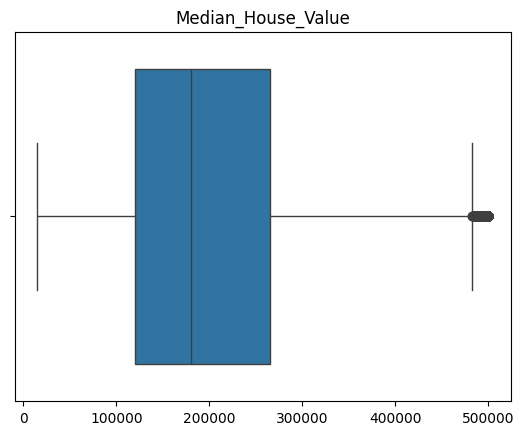

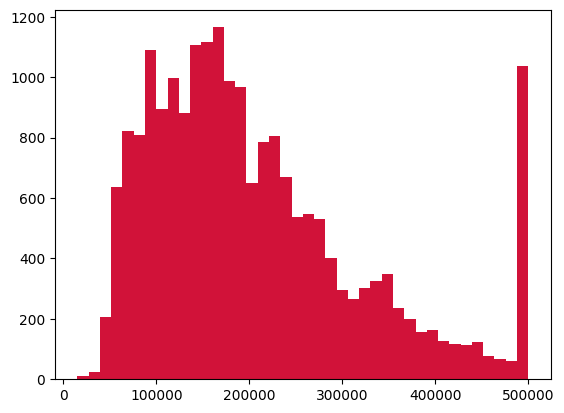

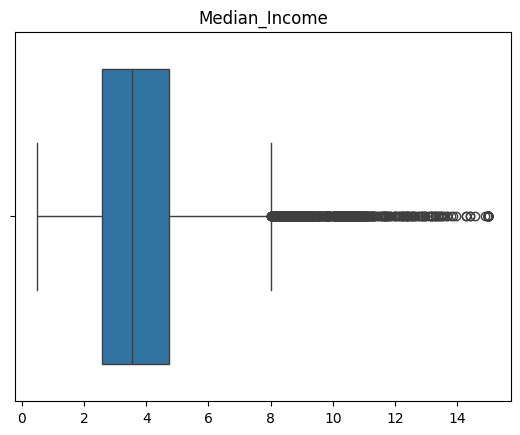

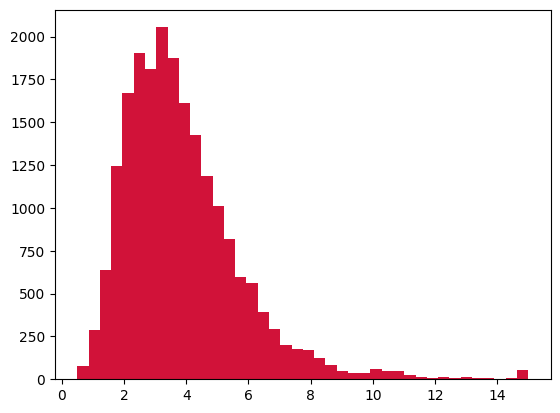

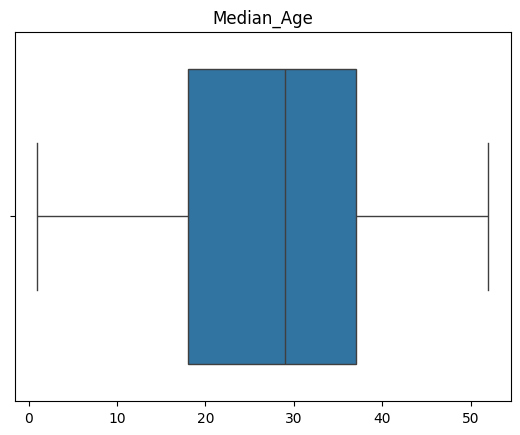

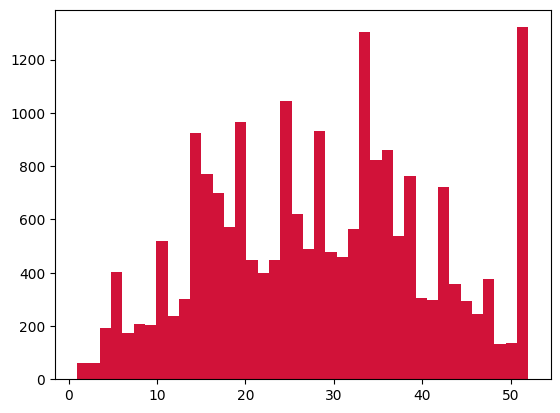

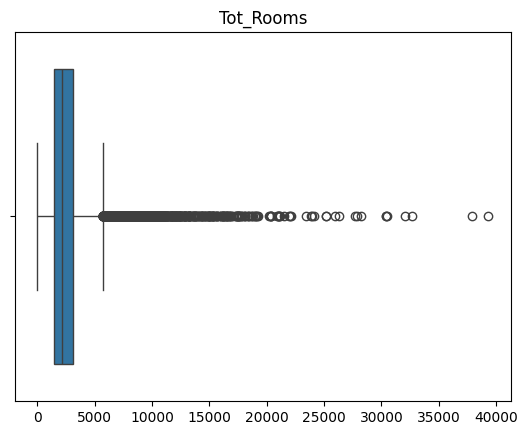

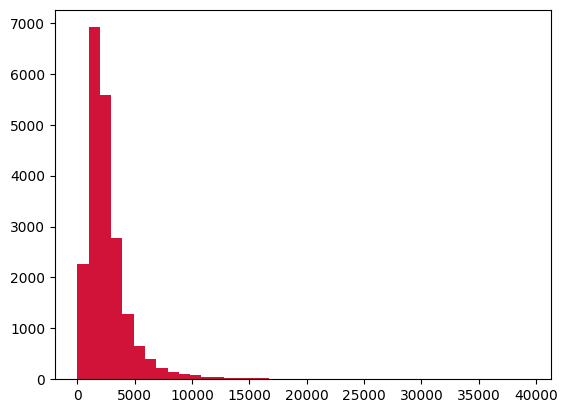

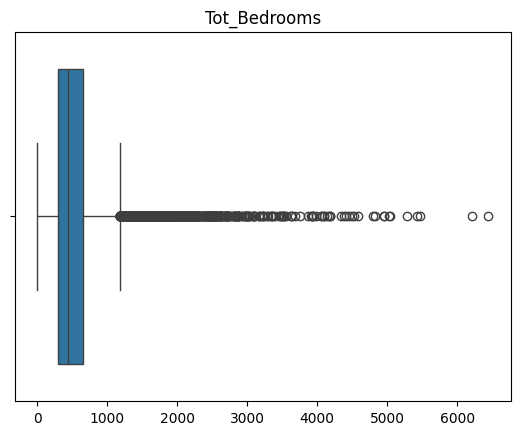

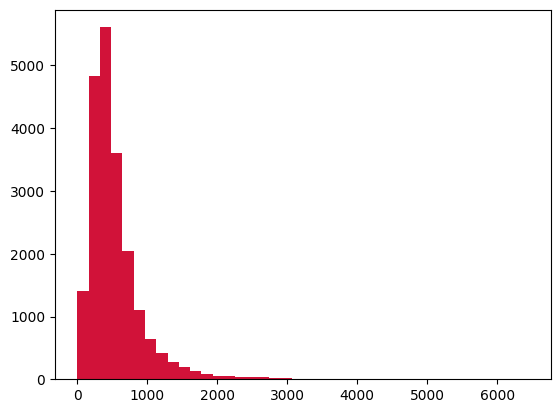

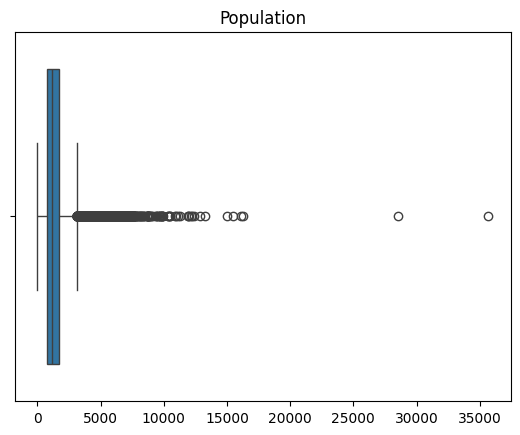

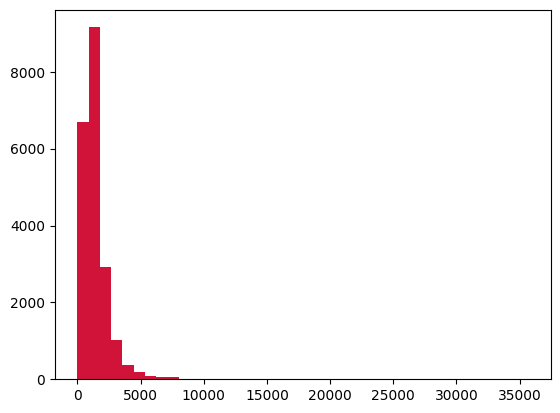

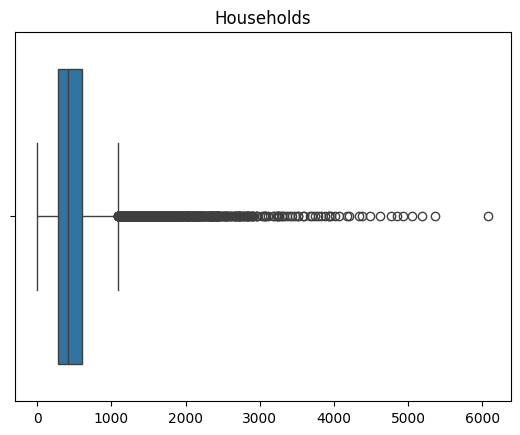

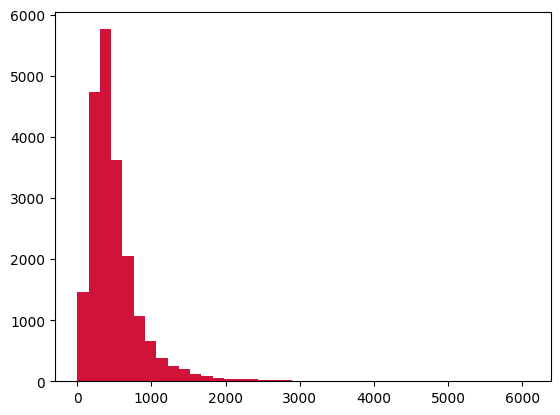

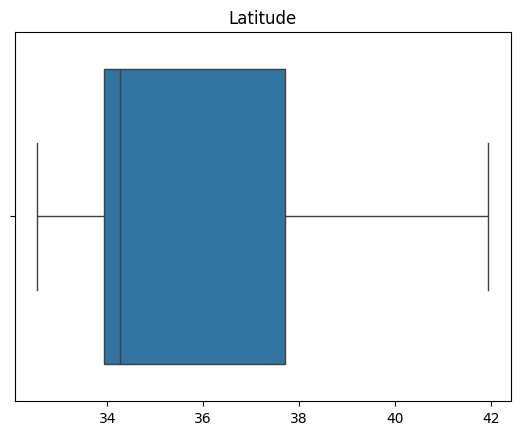

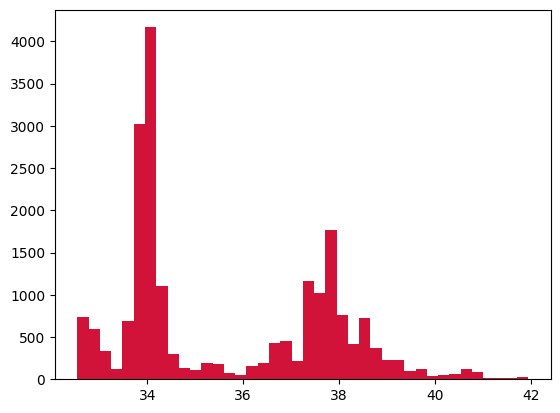

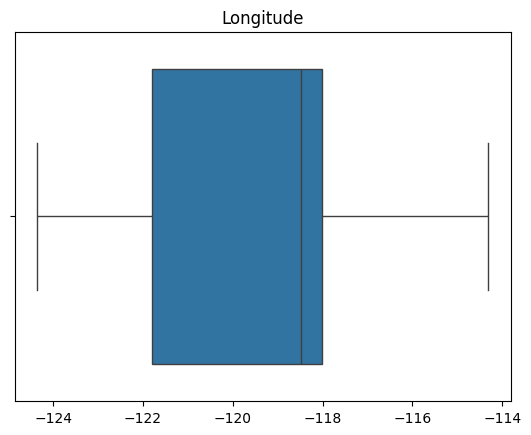

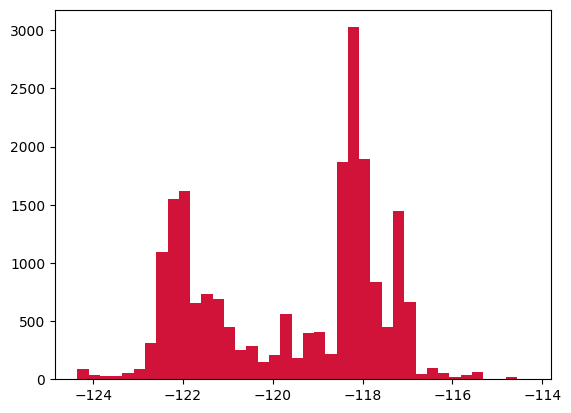

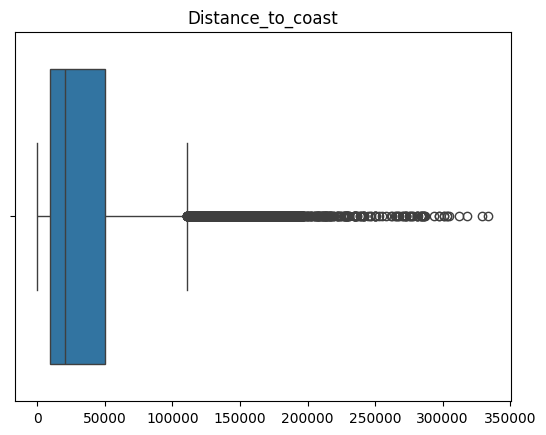

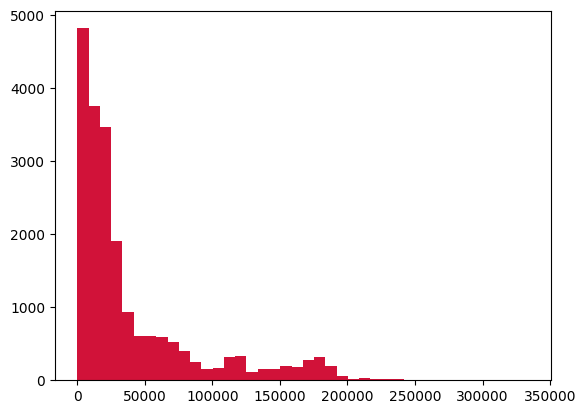

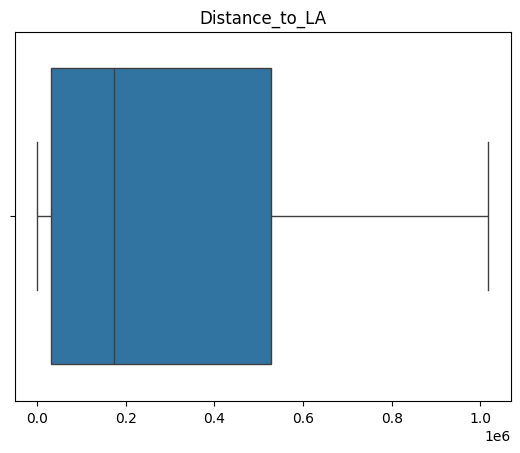

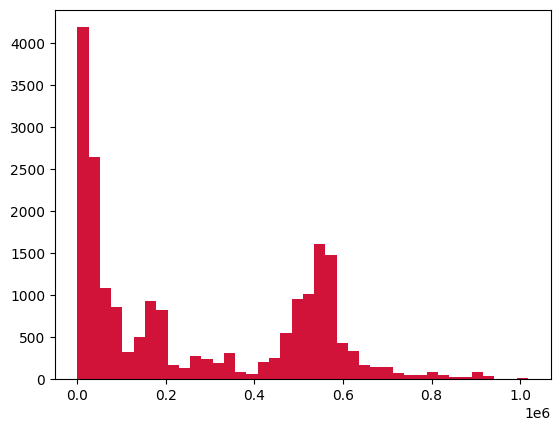

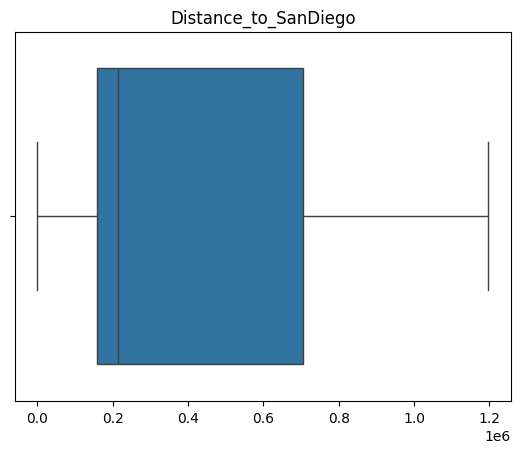

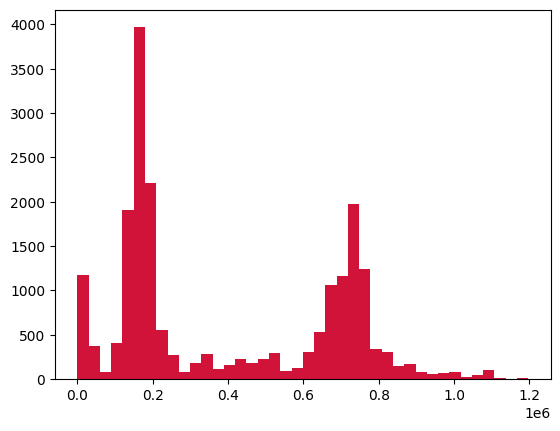

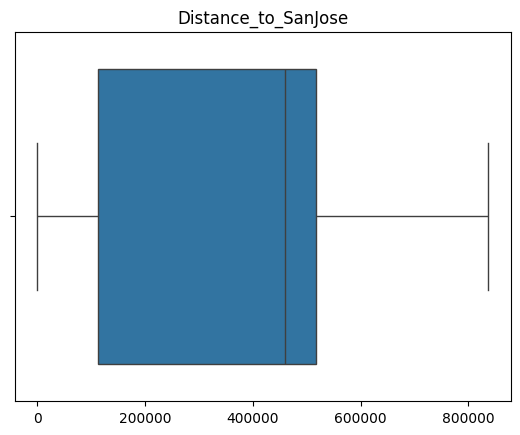

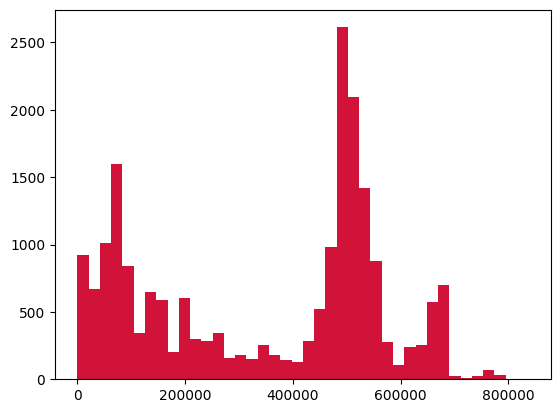

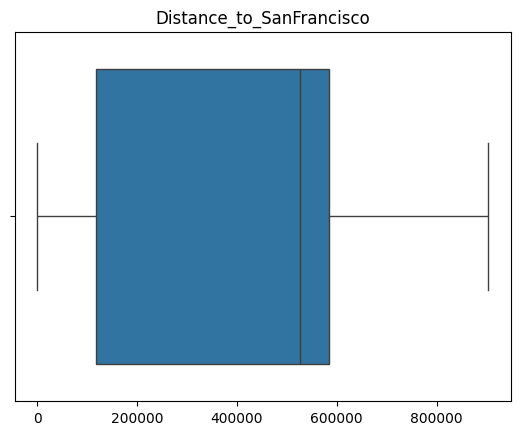

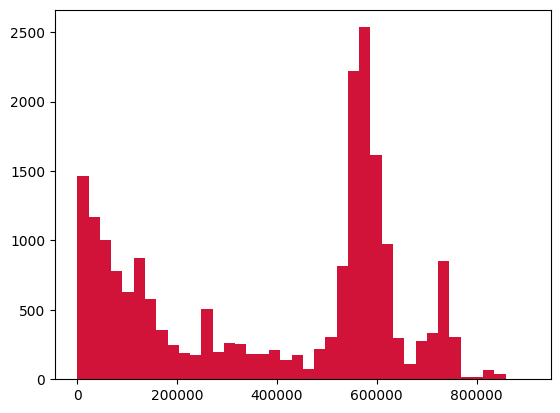

In [13]:
for col in df.columns:
    if df[col].dtype == 'float64' or df[col].dtype == 'int64':
        plot_outliers(df,col)
        plot_hist(df,col)

In [18]:
firstQ = df['Tot_Rooms'].quantile(0.25)
thirdQ = df['Tot_Rooms'].quantile(0.75)
IQR = thirdQ - firstQ
df = df[df['Tot_Rooms'] > firstQ - 1.5 * IQR]
df = df[df['Tot_Rooms'] < thirdQ + 1.5 * IQR]

firstQ = df['Households'].quantile(0.25)
thirdQ = df['Households'].quantile(0.75)
IQR = thirdQ - firstQ
df = df[df['Households'] > firstQ - 1.5 * IQR]
df = df[df['Households'] < thirdQ + 1.5 * IQR]

firstQ = df['Population'].quantile(0.25)
thirdQ = df['Population'].quantile(0.75)
IQR = thirdQ - firstQ
df = df[df['Population'] > firstQ - 1.5 * IQR]
df = df[df['Population'] < thirdQ + 1.5 * IQR]

firstQ = df['Tot_Bedrooms'].quantile(0.25)
thirdQ = df['Tot_Bedrooms'].quantile(0.75)
IQR = thirdQ - firstQ
df = df[df['Tot_Bedrooms'] > firstQ - 1.5 * IQR]
df = df[df['Tot_Bedrooms'] < thirdQ + 1.5 * IQR]


In [20]:
df.shape

(17926, 14)

In [28]:
X = df.drop(columns=['Median_House_Value'])
Y = df['Median_House_Value']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_validate, X_test, y_validate, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [48]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_validate.values)
X_test_scaled = scaler.transform(X_test.values)

In [50]:
my_model = LinearRegression()
my_model.fit(X_train , y_train)

LinearRegression()

In [51]:
print(f'The Linear regression coefficients are: {my_model.coef_}')
print(f'The Linear regression interception is: {my_model.intercept_}')

The Linear regression coefficients are: [ 3.92667751e+04  7.95847719e+02 -7.95291270e+00  2.03496579e+02
 -9.01515844e+01  9.76843071e+01 -4.28714763e+04 -2.51041188e+04
 -2.28826627e-01 -1.56624904e-01  2.36549975e-01  1.27343555e-01
 -1.18524181e-01]
The Linear regression interception is: -1491710.8586345834


In [52]:
y_predict = my_model.predict(X_test)
y_predict

array([154637.19779369, 168270.40968432, 213958.0359638 , ...,
       144655.98176457, 219512.267859  , 234877.2868225 ])

In [54]:
train_data_score = my_model.score(X_train , y_train)
test_data_score = my_model.score(X_test , y_test)
val_data_score = my_model.score(X_validate , y_validate)

print(f'The Linear regression train R^2 is: {train_data_score}')
print(f'The Linear regression val R^2 is: {val_data_score}')
print(f'The Linear regression test R^2 is: {test_data_score}')

The Linear regression train R^2 is: 0.6764662010285236
The Linear regression val R^2 is: 0.6609562122056769
The Linear regression test R^2 is: 0.6571126483029712


In [ ]:
y_pred_lr = my_model.predict(X_test)

In [58]:
import math
MSE = np.square(np.subtract(y_test,y_pred_lr)).mean() 
RMSE = math.sqrt(MSE)
print(f'Mean Absolute Error: {MSE}')
print(f'Root Mean Square Error: {RMSE}')

Mean Absolute Error: 4874344375.7349205
Root Mean Square Error: 69816.50503809913


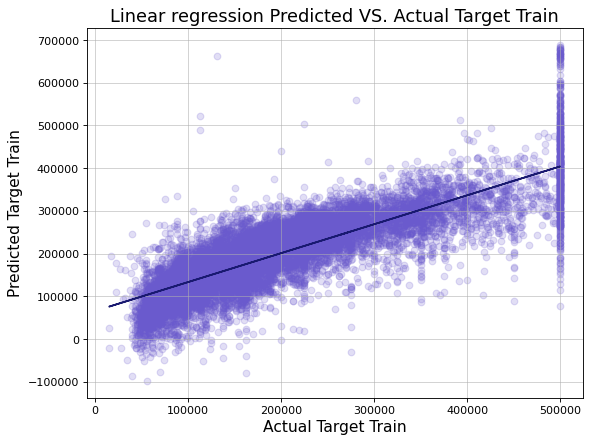

In [60]:
y_train_pred_linear = my_model.predict(X_train)
plt.figure(figsize=(8, 6), dpi=80)

plt.scatter(y_train, y_train_pred_linear, alpha=0.2, color='slateblue')

m, b = np.polyfit(y_train, y_train_pred_linear, 1)
# m = slope 
# b = intercept

plt.plot(y_train, m*y_train + b, color='midnightblue')

plt.xlabel('Actual Target Train', fontsize=14)
plt.ylabel('Predicted Target Train', fontsize=14)
plt.title('Linear regression Predicted VS. Actual Target Train', fontsize=16)
plt.grid(linewidth=0.5)